In [18]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
import warnings
warnings.filterwarnings("ignore")

https://stackoverflow.com/questions/51853583/time-series-prediction-with-multiple-features-in-the-input-data

# Streak case

In [21]:
prod_streak = pd.read_excel('./Streak/Production_streak.xlsx')
inj_streak = pd.read_excel('./Streak/Injection_streak.xlsx')

In [22]:
try:
    
    inj_streak = inj_streak.drop(columns=['Date'])
except KeyError:
    inj_nonstreak
    
    
streak = pd.concat([prod_streak,inj_streak],axis=1)
streak

,Date,P1,P2,P3,P4,I1,I2,I3,I4,I5
0,2016-01-01 00:00:00.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2016-01-02 00:00:00.000,3030.190674,180.331818,180.511932,2409.921631,284.662415,1824.588013,278.588287,270.050903,769.642883
2,2016-02-01 10:19:12.026,1034.125977,92.040901,254.523758,1092.091431,284.674286,1824.665039,278.600098,270.062286,769.675415
3,2016-03-02 20:49:12.026,1242.952759,79.237770,357.866791,1284.484741,284.674286,1824.665039,278.600098,270.062286,769.675415
4,2016-04-02 07:19:12.026,2894.078125,80.246880,343.474640,1714.793823,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...,...,...,...,...
91,2023-07-03 08:49:06.094,3200.668945,261.394318,364.123749,3200.442383,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2023-08-02 19:19:48.281,3431.033691,251.648361,397.374817,3307.727783,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2023-09-02 05:49:06.094,3455.625732,220.472061,413.389954,3223.134277,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2023-10-02 16:18:23.906,3679.903320,189.999924,424.907196,2884.804443,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [23]:
# train size = 60%

train_stop = 60
train, test = streak.iloc[:train_stop,5:].values,streak.iloc[train_stop:,5:].values
streak_p1_train, streak_p1_test = streak.iloc[:train_stop,1].values,streak.iloc[train_stop:,1].values
streak_p2_train, streak_p2_test = streak.iloc[:train_stop,2].values,streak.iloc[train_stop:,2].values
streak_p3_train, streak_p3_test = streak.iloc[:train_stop,3].values,streak.iloc[train_stop:,3].values
streak_p4_train, streak_p4_test = streak.iloc[:train_stop,4].values,streak.iloc[train_stop:,4].values

In [24]:
def production_preprocessing(data,train_stop,number_of_p_well = 1):
    train, test = data.iloc[:train_stop,5:].values,data.iloc[train_stop:,5:].values
    p_train,p_test = data.iloc[:train_stop,number_of_p_well].values,data.iloc[train_stop:,number_of_p_well].values
    
    x_train,y_train =np.column_stack((train,p_train)),p_train
    x_test,y_test =np.column_stack((test,p_test)),p_test
    
   # x_train_scaled,x_train_sc = scaling(x_train)
   # x_test_scaled,x_test_sc = scaling(x_test)
   # y_test_scaled,y_test_sc = scaling(y_test.reshape(-1,1))
   # y_train_scaled,y_train_sc = scaling(y_train.reshape(-1,1))
    
    
    return x_train,y_train, x_test,y_test

In [25]:
p1 = production_preprocessing(streak,train_stop,number_of_p_well = 1) 

p2 = production_preprocessing(streak,train_stop,number_of_p_well = 2) 

p3 = production_preprocessing(streak,train_stop,number_of_p_well = 3) 

p4 = production_preprocessing(streak,train_stop,number_of_p_well = 4) 

x_train_p1,y_train_p1 =np.column_stack((train,streak_p1_train)),streak_p1_train
x_train_p2,y_train_p2 =np.column_stack((train,streak_p2_train)),streak_p2_train
x_train_p3,y_train_p3 =np.column_stack((train,streak_p3_train)),streak_p3_train
x_train_p4,y_train_p4 =np.column_stack((train,streak_p4_train)),streak_p4_train

x_test_p1,y_test_p1 =np.column_stack((test,streak_p1_test)),streak_p1_test
x_test_p2,y_test_p2 =np.column_stack((test,streak_p2_test)),streak_p2_test
x_test_p3,y_test_p3 =np.column_stack((test,streak_p3_test)),streak_p3_test
x_test_p4,y_test_p4 =np.column_stack((test,streak_p4_test)),streak_p4_test

In [26]:
# 1,1,2 ARIMA Model
model1 = ARIMA(p1[0][:,-1],exog= p1[0][:,0:4],order=(1,1,2))
model_fit = model1.fit(disp=0)
#print(model_fit.summary())

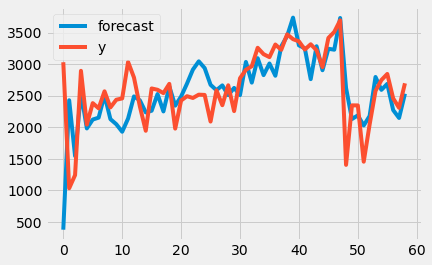

In [27]:
model_fit.plot_predict(exog=p1[3][:4])
plt.show()

In [11]:
def rmse(test,pred):
    rmse = np.sqrt(((test-pred)**2/len(test)).sum())
    return rmse

In [28]:
# Build Model
# model = ARIMA(train, order=(3,2,1)) 
def ARIMA_pred(p1,order=4):   
    model = ARIMA(p1[0][:,-1],exog= p1[0][:,:4],order=(order, 0,1))  
    fitted = model.fit(disp=-1)  

    # Forecast
    fc, se, conf = fitted.forecast(36,exog =p1[2][:,:4],  alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=streak.iloc[train_stop:,5:].index)
    lower_series = pd.Series(conf[:, 0], index=streak.iloc[train_stop:,5:].index)
    upper_series = pd.Series(conf[:, 1], index=streak.iloc[train_stop:,5:].index)

    test = pd.DataFrame(p1[3],index=streak.iloc[train_stop:,5:].index)
   # print(r2_score(test,fc))
    print(rmse(test.values,fc))
    print(mean_absolute_error(test.values,fc))
    
    return test,fc_series,lower_series,upper_series

# Plot
plt.figure(figsize=(12,5), dpi=100)


<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

4528.672369378013
317.6769948677926
255.3533783953847
29.952202076969165
300.98260301077727
32.67397015886659
4778.211647662092
406.36701725993197


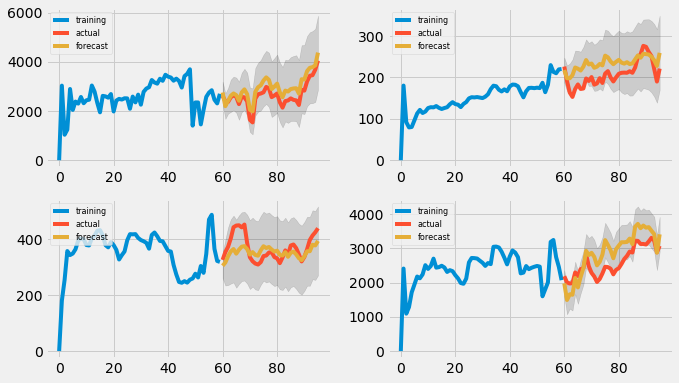

In [29]:
fig,ax = plt.subplots(2,2, figsize=(10,6))

test,fc_series,lower_series,upper_series = ARIMA_pred(p1)

ax[0,0].plot(p1[0][:,-1], label='training')
ax[0,0].plot(test, label='actual')
ax[0,0].plot(fc_series, label='forecast')
ax[0,0].fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
ax[0,0].legend(loc='upper left', fontsize=8)


test,fc_series,lower_series,upper_series = ARIMA_pred(p2,order=3)

ax[0,1].plot(p2[0][:,-1], label='training')
ax[0,1].plot(test, label='actual')
ax[0,1].plot(fc_series, label='forecast')
ax[0,1].fill_between(lower_series.index, lower_series, upper_series, 
               color='k', alpha=.15)
ax[0,1].legend(loc='upper left', fontsize=8)



test,fc_series,lower_series,upper_series = ARIMA_pred(p3)

ax[1,0].plot(p3[0][:,-1], label='training')
ax[1,0].plot(test, label='actual')
ax[1,0].plot(fc_series, label='forecast')
ax[1,0].fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

ax[1,0].legend(loc='upper left', fontsize=8)


test,fc_series,lower_series,upper_series = ARIMA_pred(p4)

ax[1,1].plot(p4[0][:,-1], label='training')
ax[1,1].plot(test, label='actual')
ax[1,1].plot(fc_series, label='forecast')
ax[1,1].fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

ax[1,1].legend(loc='upper left', fontsize=8)




# Non streak case

In [30]:
prod_nonstreak = pd.read_excel('./Non_Streak/Production_nonstreak.xlsx')
inj_nonstreak = pd.read_excel('./Non_Streak/Injection_nonstreak.xlsx')

In [31]:
try:
    
    inj_streak = inj_nonstreak.drop(columns=['Time [days]'])
except KeyError:
    inj_nonstreak
    
    
streak = pd.concat([prod_nonstreak,inj_nonstreak],axis=1)
streak

,Time [days],P1,P2,P3,P4,Time [days],I1,I2,I3,I4,I5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,42.794113,42.794086,42.794121,42.794094,1.000000,284.662415,1824.588013,278.588287,270.050903,769.642883
2,31.430000,41.098396,32.640354,43.460705,34.996902,31.430000,284.674286,1824.665039,278.600098,270.062286,769.675415
3,61.867500,74.807091,41.005371,83.802605,50.165264,61.867500,284.674286,1824.665039,278.600098,270.062286,769.675415
4,92.305000,129.125595,71.362114,128.713333,70.953720,92.305000,2040.237061,1067.610962,792.954712,259.661194,400.257812
...,...,...,...,...,...,...,...,...,...,...,...
91,2740.367432,1658.946777,1674.509155,1483.775879,1509.722290,2740.367432,2350.989990,1057.503052,1378.949951,1132.526001,1146.244995
92,2770.805420,1726.047363,1728.648315,1531.512329,1543.862793,2770.805420,2562.417969,1036.017944,1374.072998,1055.182983,1429.140015
93,2801.242432,1791.977295,1761.811523,1579.751099,1557.398682,2801.242432,2515.922119,1250.417969,1449.972046,799.789429,1246.973999
94,2831.679443,1850.891846,1780.687378,1614.357544,1549.049438,2831.679443,2709.281006,1382.046997,1184.909058,639.970215,1215.328979


In [32]:
# train size = 60%

train_stop = 60
train, test = streak.iloc[:train_stop,5:].values,streak.iloc[train_stop:,5:].values
streak_p1_train, streak_p1_test = streak.iloc[:train_stop,1].values,streak.iloc[train_stop:,1].values
streak_p2_train, streak_p2_test = streak.iloc[:train_stop,2].values,streak.iloc[train_stop:,2].values
streak_p3_train, streak_p3_test = streak.iloc[:train_stop,3].values,streak.iloc[train_stop:,3].values
streak_p4_train, streak_p4_test = streak.iloc[:train_stop,4].values,streak.iloc[train_stop:,4].values

In [33]:
p1 = production_preprocessing(streak,train_stop,number_of_p_well = 1) 

p2 = production_preprocessing(streak,train_stop,number_of_p_well = 2) 

p3 = production_preprocessing(streak,train_stop,number_of_p_well = 3) 

p4 = production_preprocessing(streak,train_stop,number_of_p_well = 4) 

x_train_p1,y_train_p1 =np.column_stack((train,streak_p1_train)),streak_p1_train
x_train_p2,y_train_p2 =np.column_stack((train,streak_p2_train)),streak_p2_train
x_train_p3,y_train_p3 =np.column_stack((train,streak_p3_train)),streak_p3_train
x_train_p4,y_train_p4 =np.column_stack((train,streak_p4_train)),streak_p4_train

x_test_p1,y_test_p1 =np.column_stack((test,streak_p1_test)),streak_p1_test
x_test_p2,y_test_p2 =np.column_stack((test,streak_p2_test)),streak_p2_test
x_test_p3,y_test_p3 =np.column_stack((test,streak_p3_test)),streak_p3_test
x_test_p4,y_test_p4 =np.column_stack((test,streak_p4_test)),streak_p4_test

In [35]:
def ARIMA_pred(p1,order=4):   
    model = ARIMA(p1[0][:,-1],exog= p1[0][:,:4],order=(order, 1,2))  
    fitted = model.fit(disp=-1)  

    # Forecast
    fc, se, conf = fitted.forecast(36,exog =p1[2][:,:4],  alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=streak.iloc[train_stop:,5:].index)
    lower_series = pd.Series(conf[:, 0], index=streak.iloc[train_stop:,5:].index)
    upper_series = pd.Series(conf[:, 1], index=streak.iloc[train_stop:,5:].index)

    test = pd.DataFrame(p1[3],index=streak.iloc[train_stop:,5:].index)
    print(rmse(test.values,fc))
    print(mean_absolute_error(test.values,fc))
    
    return test,fc_series,lower_series,upper_series

6349.374353225138
820.2549999781163
15008.766056292527
2150.037893342911
2963.0868825031257
437.42349439778764
4662.047114347868
686.9544641258092


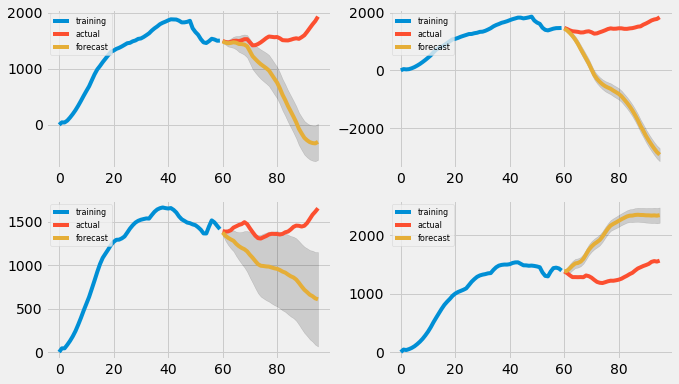

In [36]:
fig,ax = plt.subplots(2,2, figsize=(10,6))

test,fc_series,lower_series,upper_series = ARIMA_pred(p1,4)

ax[0,0].plot(p1[0][:,-1], label='training')
ax[0,0].plot(test, label='actual')
ax[0,0].plot(fc_series, label='forecast')
ax[0,0].fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
ax[0,0].legend(loc='upper left', fontsize=8)


test,fc_series,lower_series,upper_series = ARIMA_pred(p2,order=4)

ax[0,1].plot(p2[0][:,-1], label='training')
ax[0,1].plot(test, label='actual')
ax[0,1].plot(fc_series, label='forecast')
ax[0,1].fill_between(lower_series.index, lower_series, upper_series, 
               color='k', alpha=.15)
ax[0,1].legend(loc='upper left', fontsize=8)



test,fc_series,lower_series,upper_series = ARIMA_pred(p3,4)

ax[1,0].plot(p3[0][:,-1], label='training')
ax[1,0].plot(test, label='actual')
ax[1,0].plot(fc_series, label='forecast')
ax[1,0].fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

ax[1,0].legend(loc='upper left', fontsize=8)


test,fc_series,lower_series,upper_series = ARIMA_pred(p4,5)

ax[1,1].plot(p4[0][:,-1], label='training')
ax[1,1].plot(test, label='actual')
ax[1,1].plot(fc_series, label='forecast')
ax[1,1].fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)

ax[1,1].legend(loc='upper left', fontsize=8)
